In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import calendar
import datetime as dt

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from IPython.display import HTML

In [2]:
df = pd.read_csv("CarPrice.csv")

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
df = df.drop(['car_ID', 'symboling'],axis=1)

In [6]:
df["car_company"] = df["CarName"].apply(lambda x : x.split(" ")[0])

In [7]:
df_int = df.select_dtypes(exclude=["object"])
df_obj = df.select_dtypes(include=["object"])

In [8]:
df_obj = pd.get_dummies(df_obj,drop_first=True)

In [9]:
df_data = pd.concat([df_int,df_obj],axis=1)

In [10]:
df_data.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       ...
       'car_company_porsche', 'car_company_renault', 'car_company_saab',
       'car_company_subaru', 'car_company_toyota', 'car_company_toyouta',
       'car_company_vokswagen', 'car_company_volkswagen', 'car_company_volvo',
       'car_company_vw'],
      dtype='object', length=216)

In [11]:
df.isna().sum()

CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
car_company         0
dtype: int64

<AxesSubplot:>

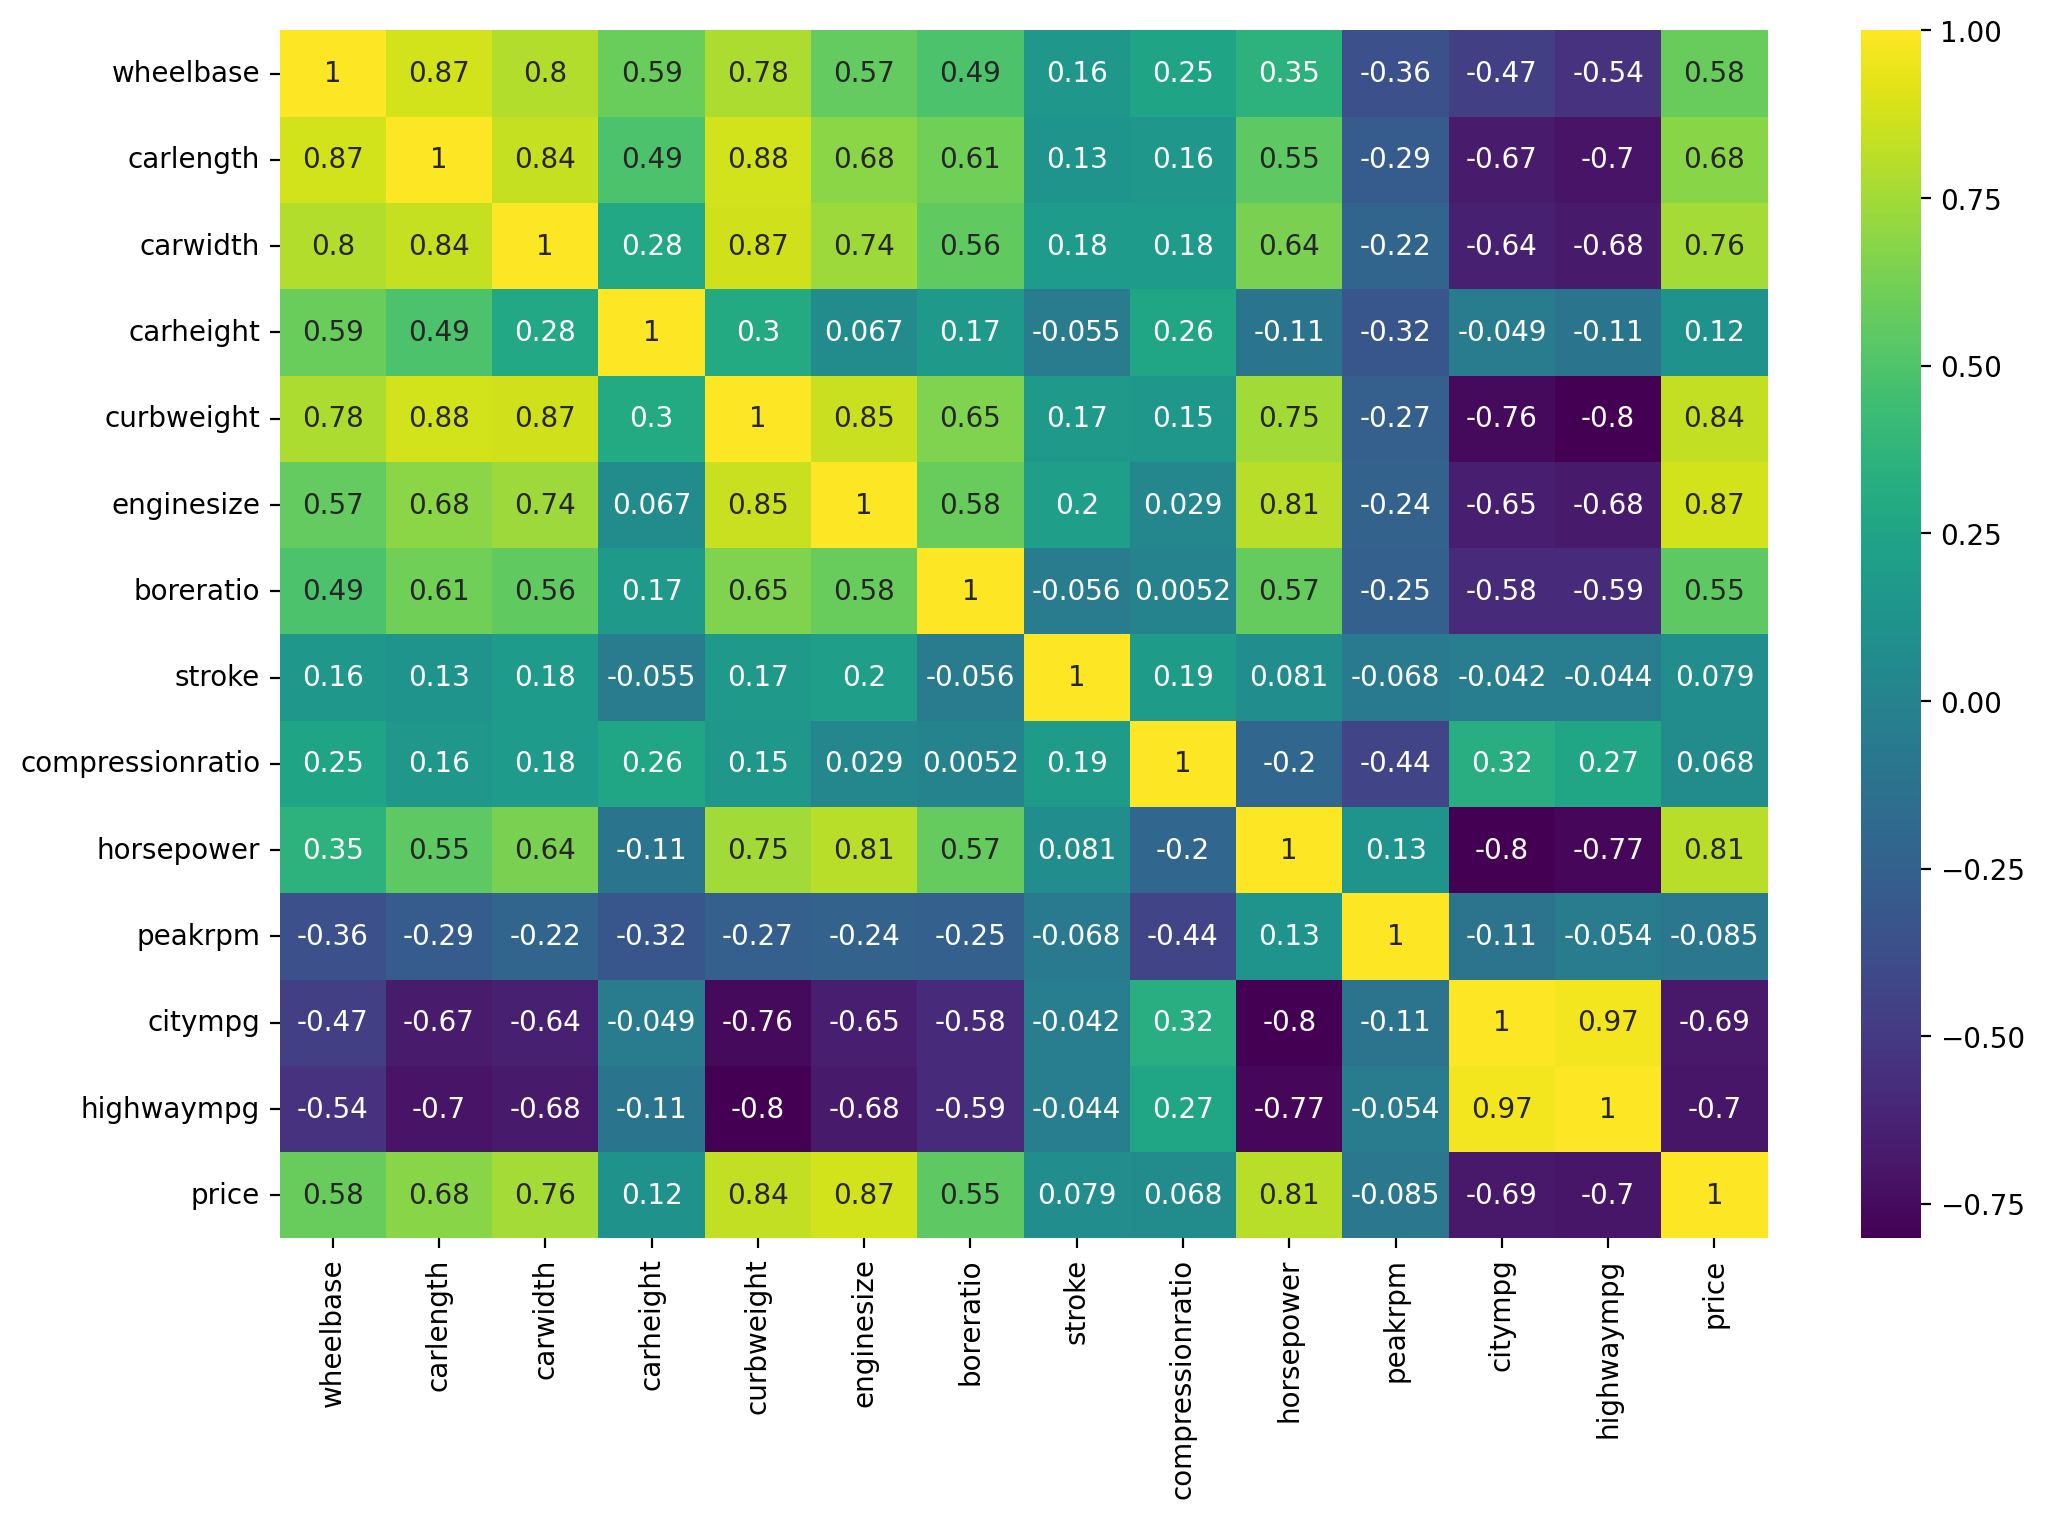

In [32]:
plt.figure(figsize=(12,8),dpi=200)
sns.heatmap(df.corr(),annot=True,cmap="viridis")

In [13]:
X = df_data.drop("price",axis=1)
y = df_data["price"]

In [14]:
X

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_toyouta,car_company_vokswagen,car_company_volkswagen,car_company_volvo,car_company_vw
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,0,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,0,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,0,0,0,0,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,0,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,...,0,0,0,0,0,0,0,0,1,0
201,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,...,0,0,0,0,0,0,0,0,1,0
202,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,...,0,0,0,0,0,0,0,0,1,0
203,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,...,0,0,0,0,0,0,0,0,1,0


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
from sklearn.preprocessing import scale

In [17]:
cols = X.columns

In [18]:
df_data.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       ...
       'car_company_porsche', 'car_company_renault', 'car_company_saab',
       'car_company_subaru', 'car_company_toyota', 'car_company_toyouta',
       'car_company_vokswagen', 'car_company_volkswagen', 'car_company_volvo',
       'car_company_vw'],
      dtype='object', length=216)

In [19]:
X = pd.DataFrame(scale(X))

In [20]:
X.columns = cols

In [21]:
X

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_toyouta,car_company_vokswagen,car_company_volkswagen,car_company_volvo,car_company_vw
0,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,...,-0.141069,-0.099258,-0.17364,-0.249351,-0.422091,-0.070014,-0.070014,-0.214286,-0.238120,-0.099258
1,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,...,-0.141069,-0.099258,-0.17364,-0.249351,-0.422091,-0.070014,-0.070014,-0.214286,-0.238120,-0.099258
2,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404880,0.685946,-0.288349,1.264536,...,-0.141069,-0.099258,-0.17364,-0.249351,-0.422091,-0.070014,-0.070014,-0.214286,-0.238120,-0.099258
3,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517266,0.462183,-0.035973,-0.053668,...,-0.141069,-0.099258,-0.17364,-0.249351,-0.422091,-0.070014,-0.070014,-0.214286,-0.238120,-0.099258
4,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517266,0.462183,-0.540725,0.275883,...,-0.141069,-0.099258,-0.17364,-0.249351,-0.422091,-0.070014,-0.070014,-0.214286,-0.238120,-0.099258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.721873,1.198549,1.398245,0.728239,0.763241,0.339248,1.666445,-0.336970,-0.162161,0.250533,...,-0.141069,-0.099258,-0.17364,-0.249351,-0.422091,-0.070014,-0.070014,-0.214286,4.199567,-0.099258
201,1.721873,1.198549,1.351515,0.728239,0.949992,0.339248,1.666445,-0.336970,-0.364062,1.416637,...,-0.141069,-0.099258,-0.17364,-0.249351,-0.422091,-0.070014,-0.070014,-0.214286,4.199567,-0.099258
202,1.721873,1.198549,1.398245,0.728239,0.878757,1.109571,0.926204,-1.232021,-0.338824,0.757535,...,-0.141069,-0.099258,-0.17364,-0.249351,-0.422091,-0.070014,-0.070014,-0.214286,4.199567,-0.099258
203,1.721873,1.198549,1.398245,0.728239,1.273437,0.435538,-1.183483,0.462183,3.244916,0.047732,...,-0.141069,-0.099258,-0.17364,-0.249351,-0.422091,-0.070014,-0.070014,-0.214286,4.199567,-0.099258


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
X_test

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_toyouta,car_company_vokswagen,car_company_volkswagen,car_company_volvo,car_company_vw
15,0.789639,1.214799,0.463650,0.810288,1.298465,1.976184,1.074252,0.430217,-0.540725,1.974339,...,-0.141069,-0.099258,-0.173640,-0.249351,-0.422091,-0.070014,-0.070014,-0.214286,-0.23812,-0.099258
9,0.123757,0.337262,0.930947,-0.707626,0.957693,0.098522,-0.739338,0.462183,-0.793101,1.416637,...,-0.141069,-0.099258,-0.173640,-0.249351,-0.422091,-0.070014,-0.070014,-0.214286,-0.23812,-0.099258
100,-0.259126,-0.052755,-0.330755,0.400041,-0.488182,-0.166277,0.000903,0.685946,-0.414537,-0.180418,...,-0.141069,-0.099258,-0.173640,-0.249351,-0.422091,-0.070014,-0.070014,-0.214286,-0.23812,-0.099258
132,0.057168,1.019791,0.276731,0.974387,0.197213,-0.142204,0.778156,-0.592699,-0.210112,0.149133,...,-0.141069,-0.099258,5.759051,-0.249351,-0.422091,-0.070014,-0.070014,-0.214286,-0.23812,-0.099258
68,1.871697,1.369181,2.052461,2.041030,2.299604,1.350297,0.926204,1.229370,2.866352,0.478684,...,-0.141069,-0.099258,-0.173640,-0.249351,-0.422091,-0.070014,-0.070014,-0.214286,-0.23812,-0.099258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.656462,0.353512,0.977677,0.441066,0.682380,0.315175,1.666445,-0.432868,-0.540725,1.796888,...,-0.141069,-0.099258,-0.173640,-0.249351,-0.422091,-0.070014,-0.070014,-0.214286,-0.23812,-0.099258
174,0.606521,0.126002,0.276731,0.482090,-0.145484,-0.407003,-0.221170,0.302353,3.118728,-0.788820,...,-0.141069,-0.099258,-0.173640,-0.249351,2.369157,-0.070014,-0.070014,-0.214286,-0.23812,-0.099258
31,-2.023713,-2.392856,-0.938242,-1.199923,-1.418085,-0.840310,-1.553603,0.494149,-0.237874,-0.712770,...,-0.141069,-0.099258,-0.173640,-0.249351,-0.422091,-0.070014,-0.070014,-0.214286,-0.23812,-0.099258
12,0.406756,0.223507,-0.517674,0.235942,0.297327,0.892917,-0.073121,-0.209105,-0.288349,0.427984,...,-0.141069,-0.099258,-0.173640,-0.249351,-0.422091,-0.070014,-0.070014,-0.214286,-0.23812,-0.099258


In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
# instantiate
lm = LinearRegression()
# fit"
lm.fit(X_train, y_train)
# predict 
y_pred = lm.predict(X_test)
# metrics
from sklearn.metrics import r2_score
print(r2_score(y_true=y_test, y_pred=y_pred))

-5.874176033185081e+25


In [26]:
from sklearn.feature_selection import RFE
import statsmodels.api as sm

C:\Users\Nidhi\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=4 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\Nidhi\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\Nidhi\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\Nidhi\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs

C:\Users\Nidhi\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


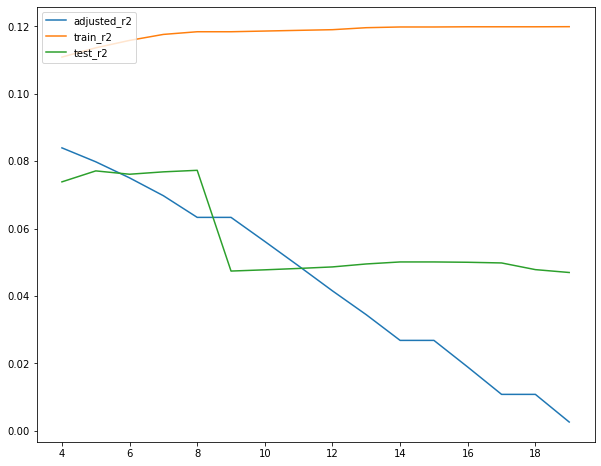

In [27]:
n_features_list = list(range(4, 20))
adjusted_r2 = []
r2 = []
test_r2 = []
for n_features in range(4, 20):
# RFE with n features
    lm = LinearRegression()
# specify number of features
    rfe_n = RFE(lm, n_features)
# fit with n features
    rfe_n.fit(X_train, y_train)
# subset the features selected by rfe_6
    col_n = X_train.columns[rfe_n.support_]
# subsetting training data for 6 selected columns
    X_train_rfe_n = X_train[col_n]
# add a constant to the model
    X_train_rfe_n = sm.add_constant(X_train_rfe_n)
# fitting the model with 6 variables
    lm_n = sm.OLS(y_train, X_train_rfe_n).fit()
    adjusted_r2.append(lm_n.rsquared_adj)
    r2.append(lm_n.rsquared)
    
    
    # making predictions using rfe_15 sm model
    X_test_rfe_n = X_test[col_n]
# # Adding a constant variable 
    X_test_rfe_n = sm.add_constant(X_test_rfe_n, has_constant='add')
# # Making predictions
    y_pred = lm_n.predict(X_test_rfe_n)
    
    test_r2.append(r2_score(y_test, y_pred))
# plotting adjusted_r2 against n_features
plt.figure(figsize=(10, 8))
plt.plot(n_features_list, adjusted_r2, label="adjusted_r2")
plt.plot(n_features_list, r2, label="train_r2")
plt.plot(n_features_list, test_r2, label="test_r2")
plt.legend(loc='upper left')
plt.show()

In [29]:
# RFE with n features
lm = LinearRegression()
n_features = 6
# specify number of features
rfe_n = RFE(lm, n_features)
# fit with n features
rfe_n.fit(X_train, y_train)
# subset the features selected by rfe_6
col_n = X_train.columns[rfe_n.support_]
# subsetting training data for 6 selected columns
X_train_rfe_n = X_train[col_n]
# add a constant to the model
X_train_rfe_n = sm.add_constant(X_train_rfe_n)
# fitting the model with 6 variables
lm_n = sm.OLS(y_train, X_train_rfe_n).fit()
adjusted_r2.append(lm_n.rsquared_adj)
r2.append(lm_n.rsquared)
# making predictions using rfe_15 sm model
X_test_rfe_n = X_test[col_n]
# # Adding a constant variable 
X_test_rfe_n = sm.add_constant(X_test_rfe_n, has_constant='add')
# # Making predictions
y_pred = lm_n.predict(X_test_rfe_n)
test_r2.append(r2_score(y_test, y_pred))
# summary
lm_n.summary()

C:\Users\Nidhi\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=6 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\Nidhi\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     2.839
Date:                Sun, 19 Mar 2023   Prob (F-statistic):             0.0125
Time:                        18:40:29   Log-Likelihood:                -1415.5
No. Observations:                 137   AIC:                             2845.
Df Residuals:                     130   BIC:                             2866.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                             1.343e+04    654.634     20.513      0.000    1.21e+04    1.47e+04
CarName_peugeot 504                373.5089    586.903      0.636      0.526    -787.608    1534.626
CarName_peugeot 604sl              487.4113    752.922      0.647      0.519   -1002.154    1976.977
CarName_porsche cayenne           1051.3340    918.318      1.145      0.254    -765.449    2868.117
CarName_volkswagen rabbit custom   323.2305    568.193      0.569      0.570    -800.871    1447.332
car_company_porsche               1220.9081   1059.534      1.152      0.251    -875.252    3317.069
car_company_volkswagen            -816.5155    607.710     -1.344      0.181   -2018.796     385.765
==============================================================================
Omnibus:                       61.978   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.470
Skew:                           1.863   Prob(JB):                     3.18e-36
Kurtosis:                       6.841   Cond. No.                         3.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""